# Hotel booking demand

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

- **hotel**: The type of hotel, either "City Hotel" or "Resort Hotel."
- **is_canceled**: Binary value indicating whether the booking was cancelled (1) or not (0).
- **lead_time**: Number of days between booking and arrival.
- **arrival_date_year**: Year of arrival date.
- **arrival_date_month**: Month of arrival date.
- **arrival_date_week_number**: Week number of arrival date.
- **arrival_date_day_of_month**: Day of the month of arrival date.
- **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stays.
- **stays_in_week_nights**: Number of weekday nights (Monday to Friday) the guest stays.
- **adults**: Number of adults.
- **children**: Number of children.
- **babies**: Number of babies.
- **meal**: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_guest**: Binary value indicating whether the guest is a repeated guest (1) or not (0).
- **previous_cancellations**: Number of previous booking cancellations.
- **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**: Code of room type reserved.
- **assigned_room_type**: Code of room type assigned at check-in.
- **booking_changes**: Number of changes/amendments made to the booking.
- **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**: ID of the travel agency that made the booking.
- **company**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
- **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.
- **required_car_parking_spaces**: Number of car parking spaces required.
- **total_of_special_requests**: Number of special requests made.
- **reservation_status**: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

## Importing Libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

In [2]:
#Data Reading
hotel_df = pd.read_csv('../data/hotel_bookings.csv')

# Display columns and shape of the dataset
print(hotel_df.columns)
print(hotel_df.shape)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
(119390, 32)


In [3]:
# Display summary information about the dataset
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Display summary statistics
hotel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [5]:
# Creating a copy of dataframe
df = hotel_df.copy()

## Data Cleaning

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: 

- Remove duplicate rows.
- Handling missing values.
- Convert columns to appropriate datatypes.
- Adding important columns.

#### Removing duplicated rows if any

In [6]:
# Check for duplicates
df[df.duplicated()].shape

(31994, 32)

In [7]:
# Dropping duplicate values
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(87396, 32)

#### Handling missing values

In [9]:
# Columns having missing values.
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False)

company     82137
agent       12193
country       452
children        4
dtype: int64

<Axes: >

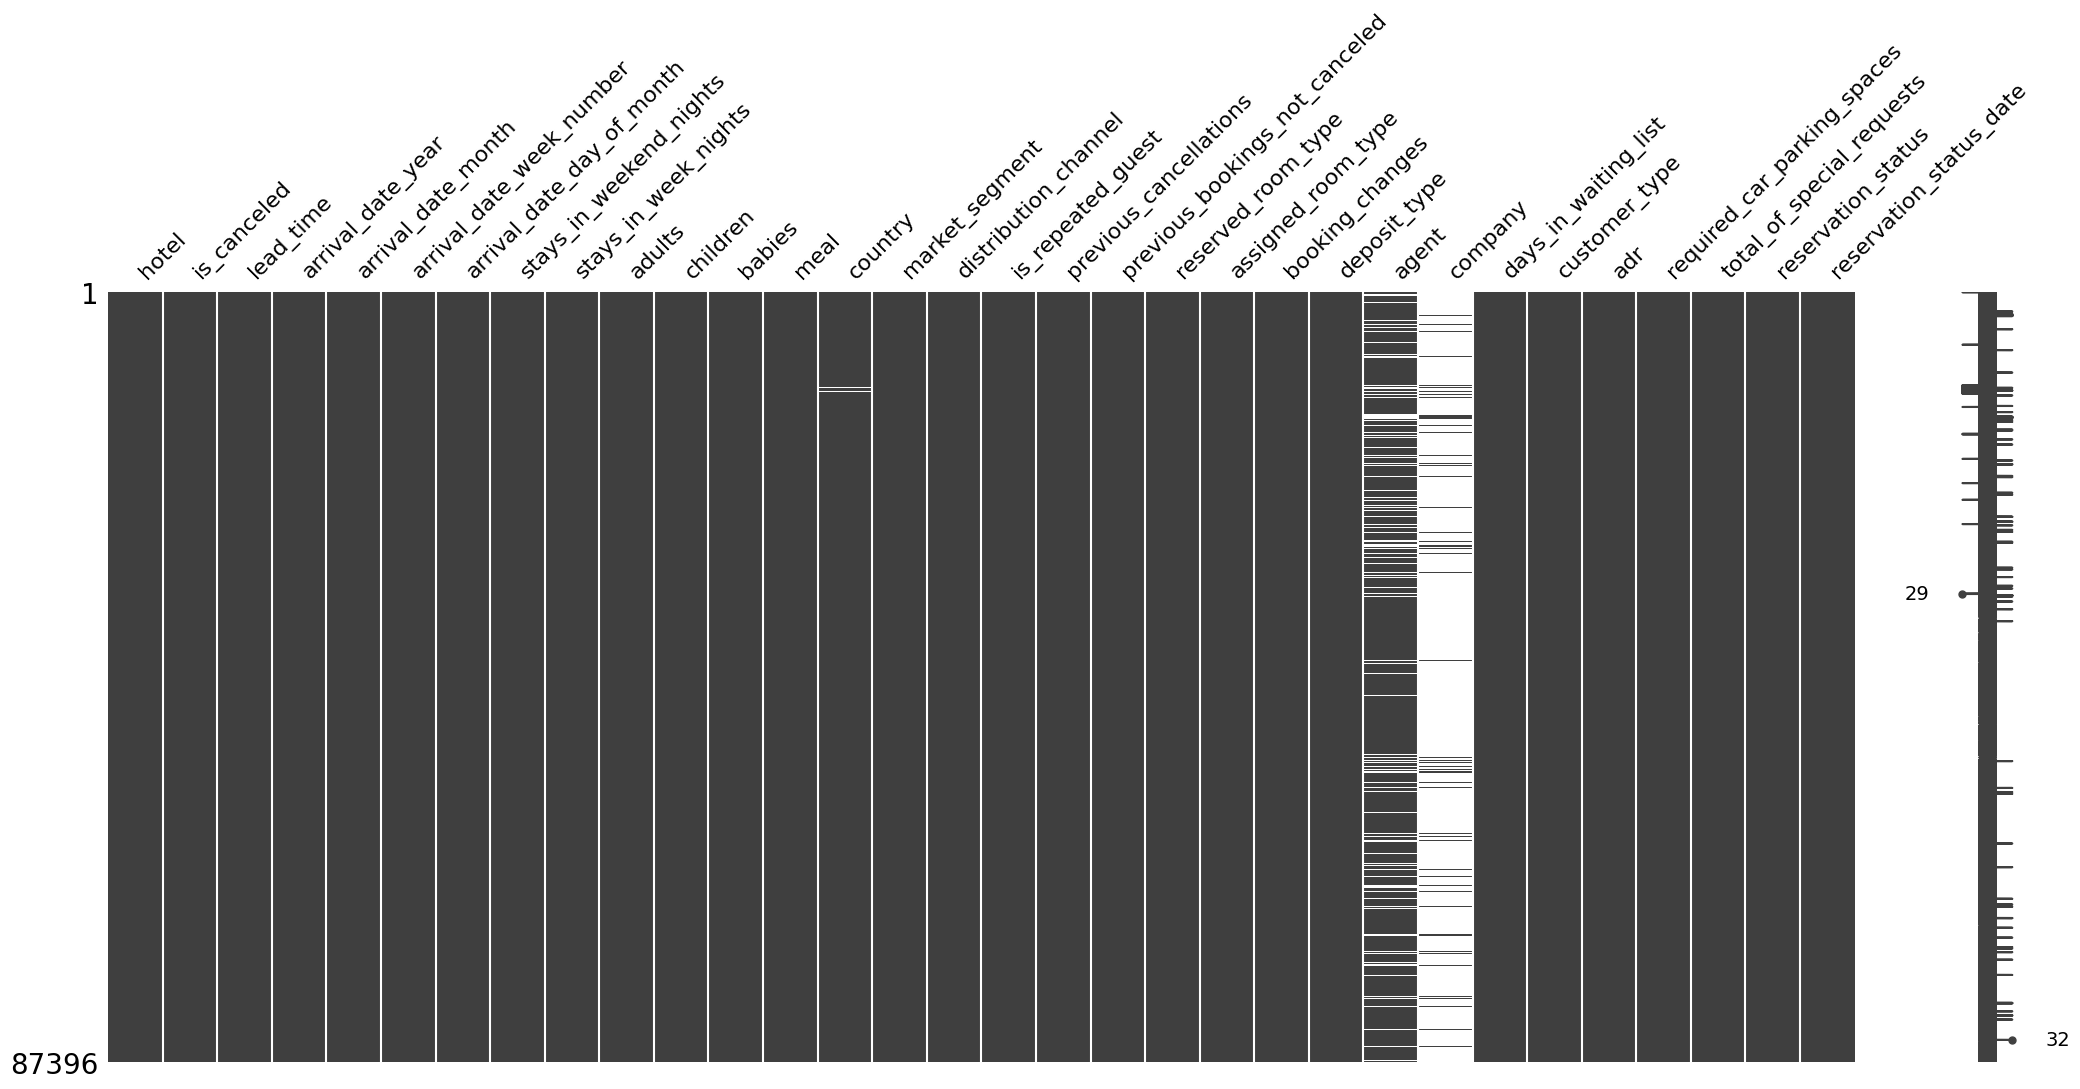

In [10]:
msno.matrix(df) 

There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns.

In [11]:
df[['company','agent']] = df[['company','agent']].fillna(0)

In [12]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [13]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

There are columns that have null values despite of having 0 as data. So let's remove such rows

In [14]:
df.drop(df[df['children'].isnull()].index, inplace = True)

In [15]:
df.drop(df[df['country'].isnull()].index, inplace = True)

In [16]:
# Checking if there are still missing values
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False)

Series([], dtype: int64)

There are some rows with total number of adults, children or babies equal to zero. So let's remove such row

In [17]:
df[df['adults']+df['babies']+df['children'] == 0].shape

(161, 32)

In [18]:
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

#### Converting columns to appropriate datatypes

In [19]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [20]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [21]:
# changing datatype of column 'reservation_status_date' to data_type.
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

#### Adding important columns

In [22]:
# Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']

#### Handling Outliers

In [23]:
# Obtaining categorical veriables
categorical_veriables=[i for i in df.columns if df[i].dtypes=='O']
print(f'Dataset having {len(categorical_veriables)} categorical variables')
print('--'*39)
print(categorical_veriables)

Dataset having 11 categorical variables
------------------------------------------------------------------------------
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


In [24]:
# Obtaining Numerical varibles
numerical_variables=[i for i in df.columns if df[i].dtypes!='O']
print(f'There are {len(numerical_variables)} numerical variables.')
print('--'*39)
print(numerical_variables)

There are 23 numerical variables.
------------------------------------------------------------------------------
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'total_stay', 'total_people']


In [25]:
# Obtaining Descrete varibles from Numerical varibles
# Variables having less than 150 categories are consider as descrete variable
descrete_variables=[]
for i in numerical_variables:
  if len(df[i].value_counts())<=150:
    descrete_variables.append(i)
    print(i,':',df[i].unique())
    print('__'*39)
  else:
      pass

print(f'Dataset having {len(descrete_variables)} descrete variables')

is_canceled : [0 1]
______________________________________________________________________________
arrival_date_year : [2015 2016 2017]
______________________________________________________________________________
arrival_date_week_number : [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]
______________________________________________________________________________
arrival_date_day_of_month : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
______________________________________________________________________________
stays_in_weekend_nights : [ 0  1  2  4  3  6 13  8  5  7 12  9 16 10 14]
______________________________________________________________________________
stays_in_week_nights : [ 0  1  2  3  4  5 11  8 10  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 25 17 32 26 18 34]
__________________________________________

In [26]:
# Obtaining contineous variables from numerical variables
contineous_variables=[i for i in numerical_variables if i not in descrete_variables]
print(f'Dataset having {len(contineous_variables)} contineous variables')
print('--'*39)
print(contineous_variables)

Dataset having 5 contineous variables
------------------------------------------------------------------------------
['lead_time', 'agent', 'company', 'adr', 'reservation_status_date']


______________________________________________________________________________


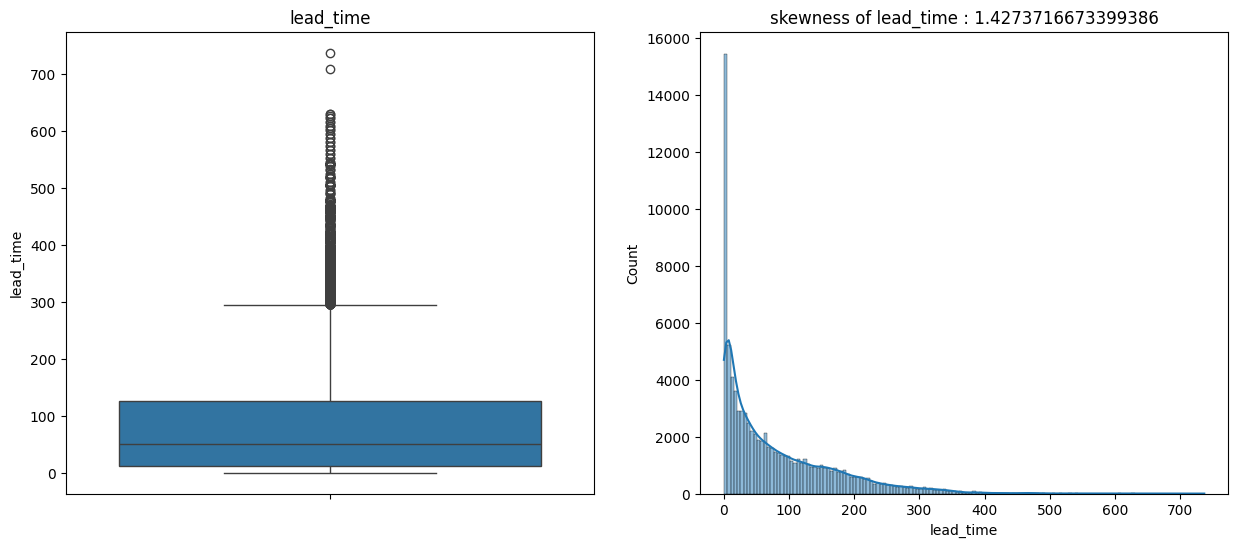

______________________________________________________________________________


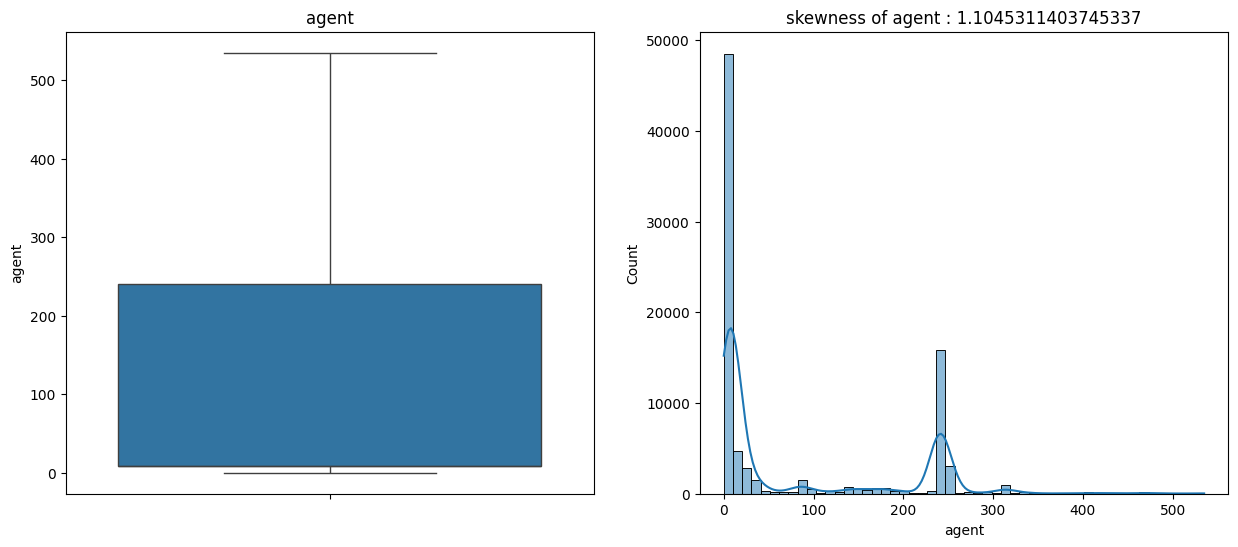

______________________________________________________________________________


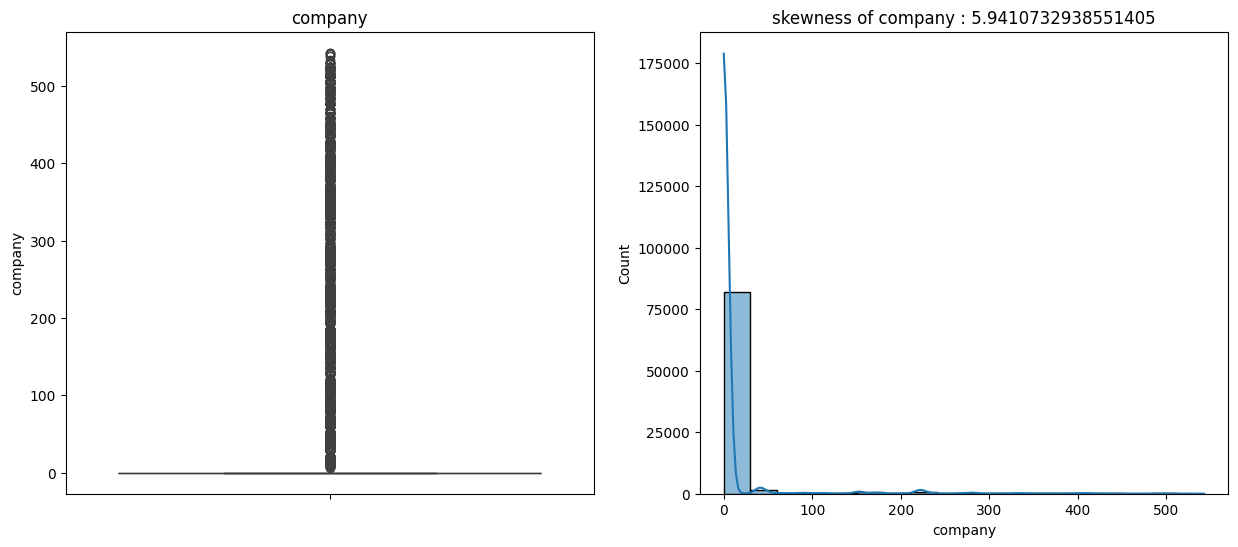

______________________________________________________________________________


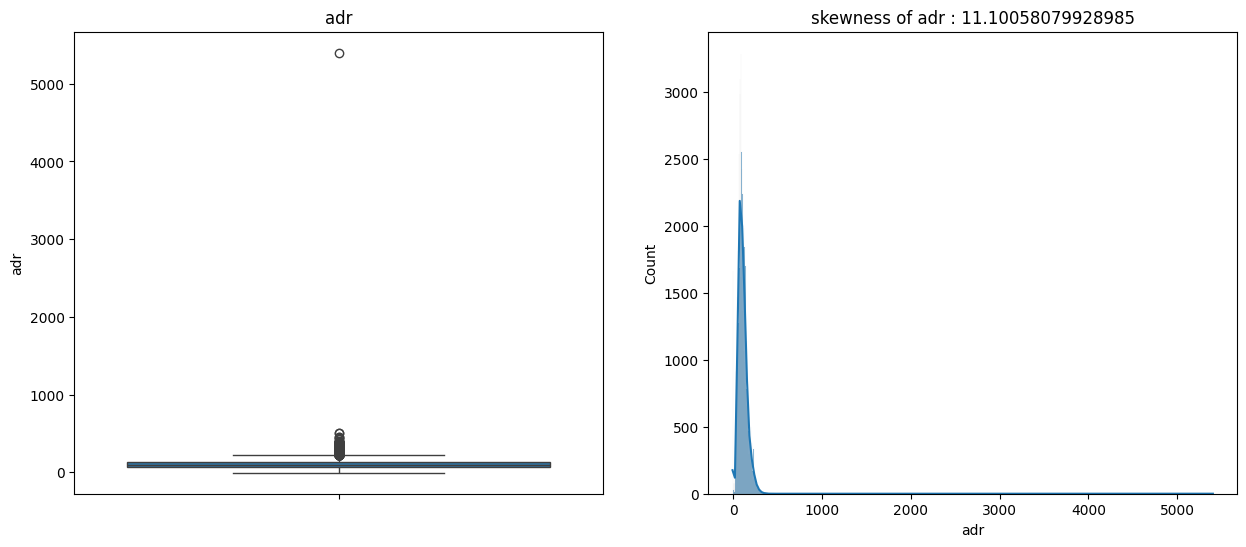

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'skew'

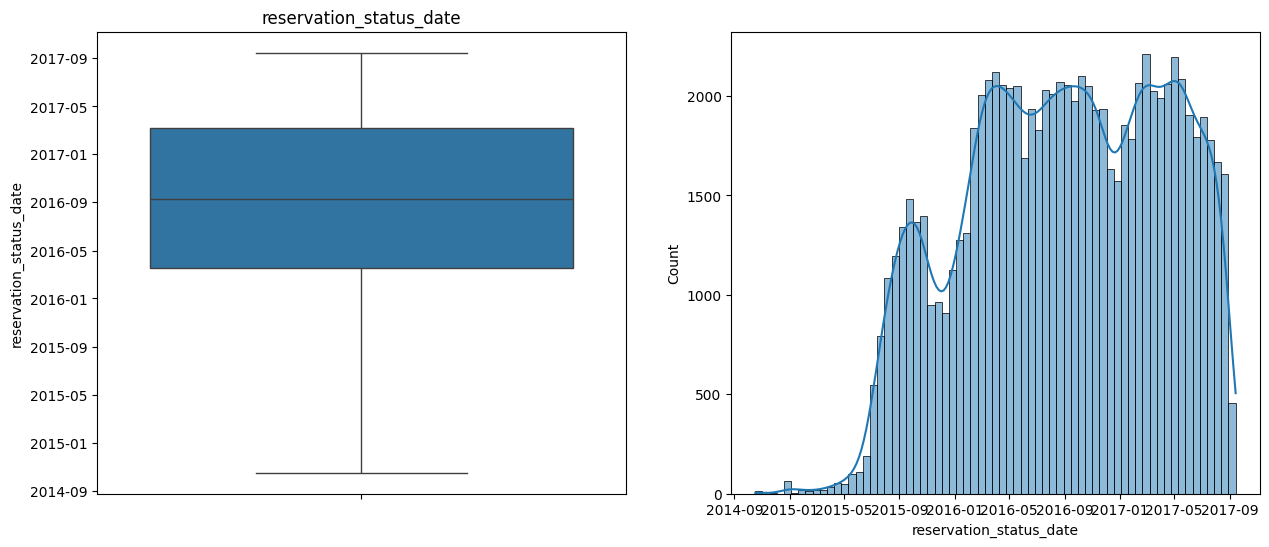

In [27]:

# Checking for outliers for contineous variables

from scipy.stats import norm
for i in contineous_variables:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  ax=sns.boxplot(data=df[i])
  ax.set_title(f'{i}')
  ax.set_ylabel(i)

  plt.subplot(1,2,2)
  #ax=sns.distplot(df[i], fit=norm)
  ax=sns.histplot(df[i], kde=True)
  ax.set_title(f'skewness of {i} : {df[i].skew()}')
  ax.set_xlabel(i)
  print('__'*39)
  plt.show()

In [ ]:
# Using Inter Quartile range in skew symmetric curve for removing outliers

# Outlier columns
outliers_columns=['lead_time','adr']

# Copy dataset as new dataset
new_df=df.copy()

# Capping dataset
for i in outliers_columns:
    #Findng IQR
    Q1=new_df[i].quantile(0.25)
    Q3=new_df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining lower and upper limit
    lower_limit =new_df[i].quantile(0.25)-1.5*IQR
    upper_limit =new_df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    new_df.loc[(new_df[i] > upper_limit),i] = upper_limit
    new_df.loc[(new_df[i] < lower_limit),i] = lower_limit

In [ ]:
# Checking for outliers for contineous variables
from scipy.stats import norm
for i in outliers_columns:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  ax=sns.boxplot(data=new_df[i])
  ax.set_title(f'{i}')
  ax.set_ylabel(i)

  plt.subplot(1,2,2)
  ax=sns.histplot(new_df[i], kde=True)
  ax.set_title(f'skewness of {i} : {new_df[i].skew()}')
  ax.set_xlabel(i)
  print('__'*50)
  plt.show()

## EDA

In [ ]:
# Check dataset balance
plt.title('Reservation Status')
plt.bar(['Not cancelled' , 'Cancelled'],new_df['is_canceled'].value_counts())
plt.show()

In [ ]:
sns.countplot(data=new_df, x='hotel', hue='is_canceled')
plt.xlabel('Hotel')
plt.ylabel('No. of Reservations')
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = new_df.groupby('assigned_room_type')
new_df['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = new_df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = new_df['assigned_room_type'], y = new_df['adr'])
plt.show()

In [ ]:
plt.figure( figsize=(10, 8))

sns.countplot(x = new_df['meal'])
plt.show()

In [ ]:
grouped_by_hotel = new_df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/new_df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

In [ ]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

In [ ]:
not_canceled = new_df[new_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

In [ ]:
group_by_dc = new_df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/new_df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14)

In [ ]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

In [ ]:
waiting_bookings = new_df[new_df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = new_df['lead_time'], hue = new_df['is_canceled'])
plt.show()

In [ ]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

new_df['same_room_not_alloted'] = new_df.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = new_df.groupby('is_canceled')

D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.show()

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'same_room_not_alloted', y = 'adr', data = new_df)
plt.show()

In [ ]:

#Special request acoording to market segment
sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= new_df)

fig = plt.gcf()
fig.set_size_inches(15,10)

In [ ]:
grouped_by_country = new_df.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

In [ ]:
filter = new_df['is_canceled'] == 0
data = new_df[filter]
data.head()

In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

In [ ]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel')

## Feature revision

In [ ]:
numeric_cols = new_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = new_df.select_dtypes('object').columns.tolist()

In [ ]:
numeric_cols

In [ ]:
categorical_cols

In [ ]:
new_df.sample(20).to_clipboard(index=False)

In [ ]:
new_df['reservation_status_date'] = pd.to_datetime(new_df['reservation_status_date'])

# Correlation matrix to understand relationships
corr_matrix = new_df[numeric_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
corr_matrix['is_canceled']

In [ ]:
# Basic statistical analysis to see distributions
desc_stats = new_df.describe(include='all')

In [ ]:
desc_stats.T

Conclusions:

Target column
- 'is_canceled'

Keep this categorical columns:
- 'hotel'
- 'meal'
- 'market_segment'
- 'distribution_channel'
- 'reserved_room_type'
- 'deposit_type'
- 'customer_type'

Keep numeric columns:
- 'lead_time'
- 'arrival_date_week_number'
- 'arrival_date_day_of_month'
- 'days_in_waiting_list'
- 'adr'
- 'total_stay'
- 'total_people'

Chage type to binary
- 'is_repeated_guest'
- 'previous_cancellations'
- 'previous_bookings_not_canceled'
- 'booking_changes'
- 'agent'
- 'company'
- 'required_car_parking_spaces'
- 'total_of_special_requests'

Drop these columns:
- 'arrival_date_month'
- 'country'
- 'assigned_room_type'
- 'reservation_status',
- 'reservation_status_date'
- 'stays_in_weekend_nights'
- 'stays_in_week_nights'
- 'adults'
- 'children'
- 'babies'
- 'arrival_date_year'